### Import dataset and necessary library

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import r2_score

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [120]:
df = pd.read_csv('../Datasets/50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [122]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [123]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

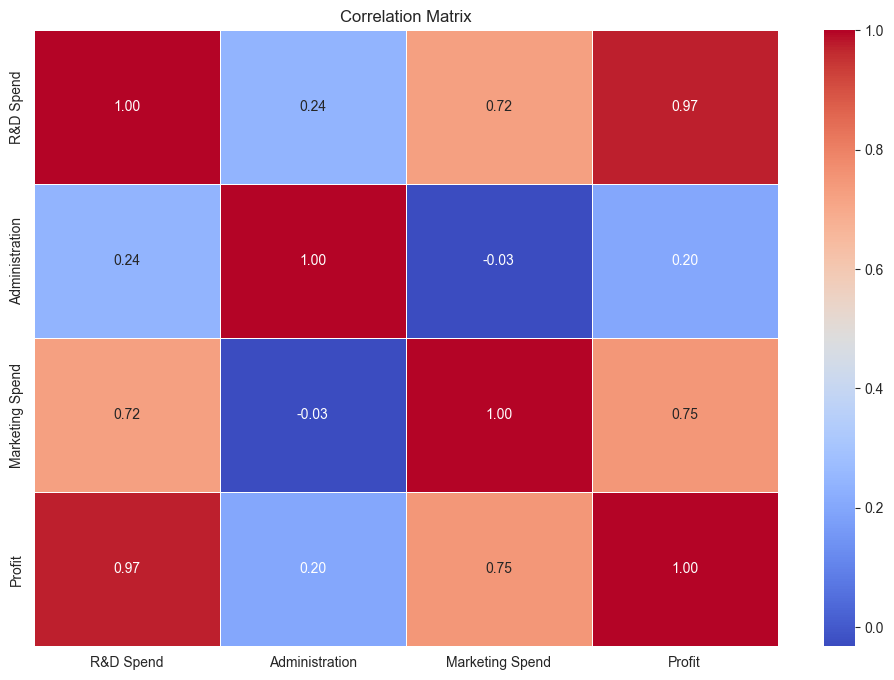

In [124]:
danum = df.select_dtypes(include=['number'])

plt.figure(figsize=(12,8))
sns.heatmap(danum.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [125]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

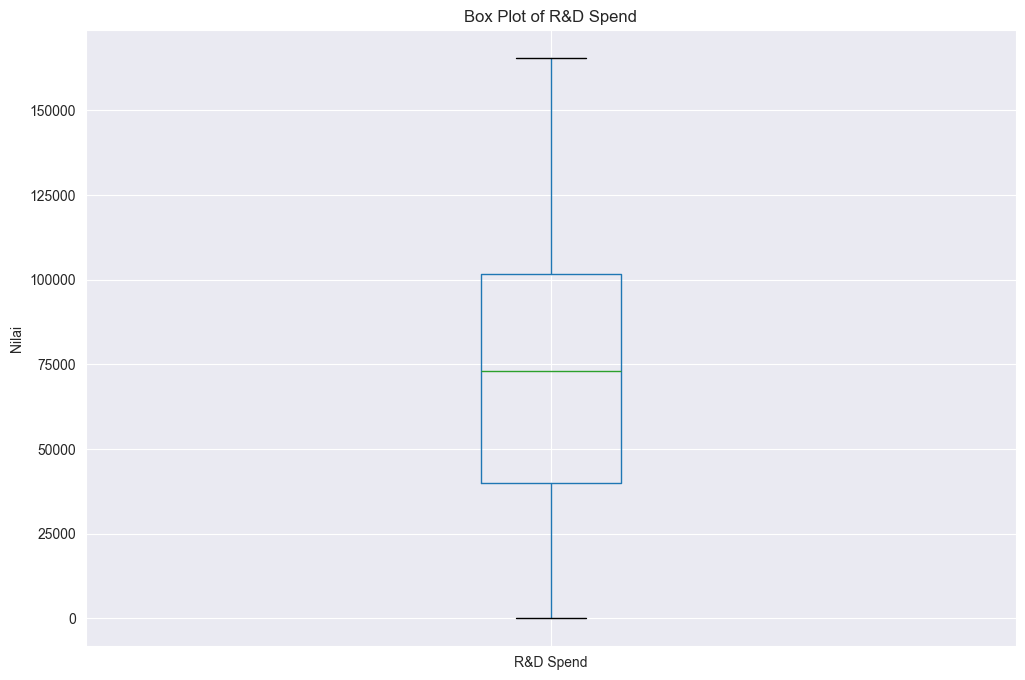

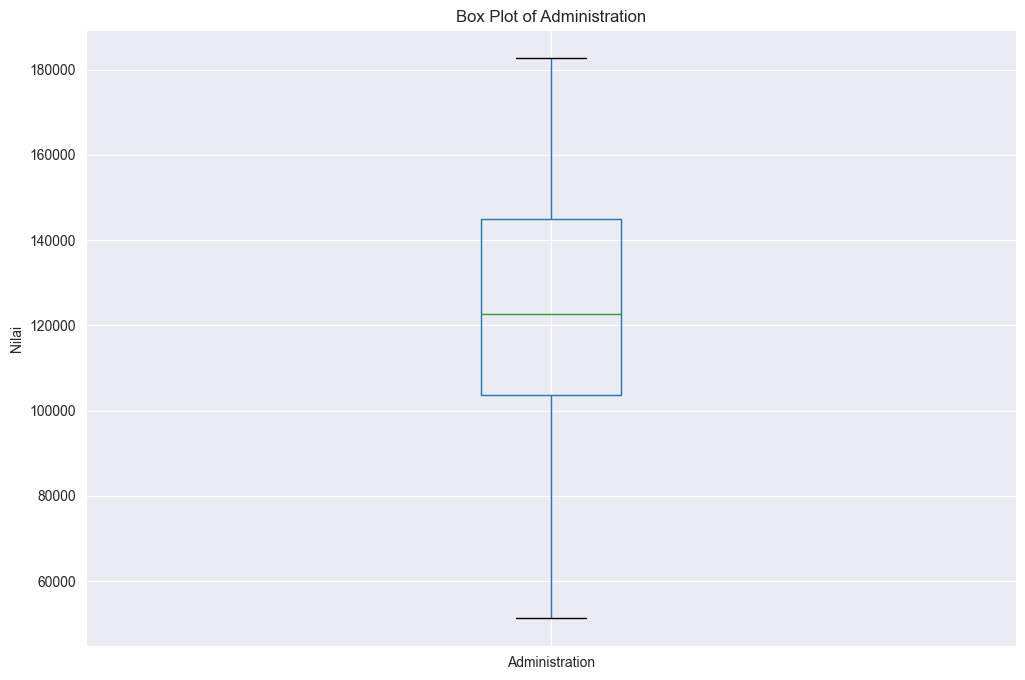

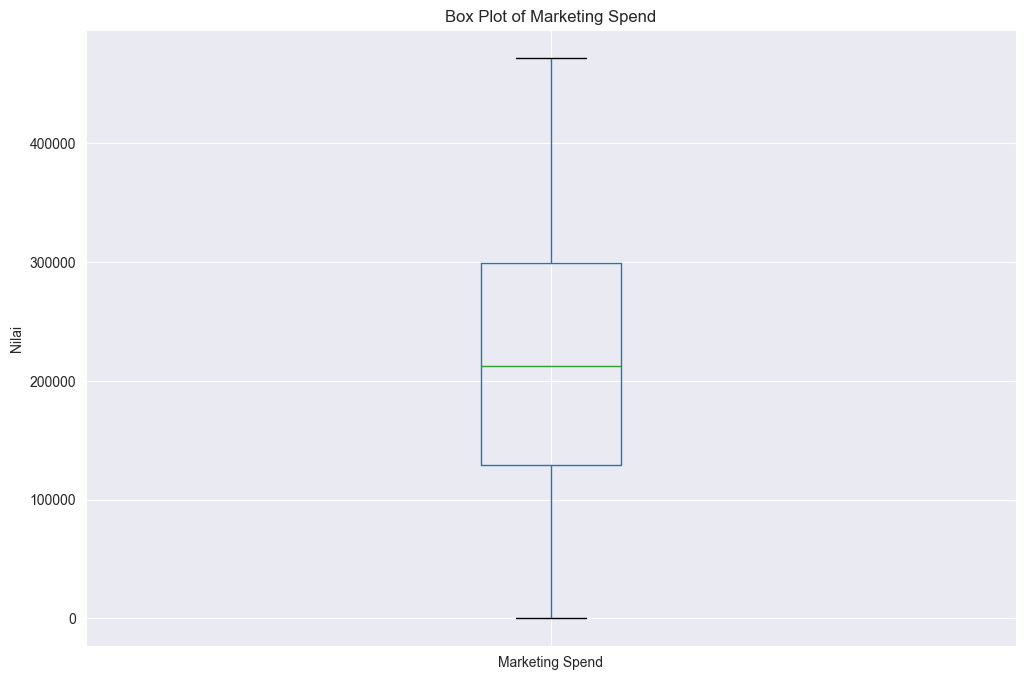

KeyError: "None of [Index(['State'], dtype='object')] are in the [columns]"

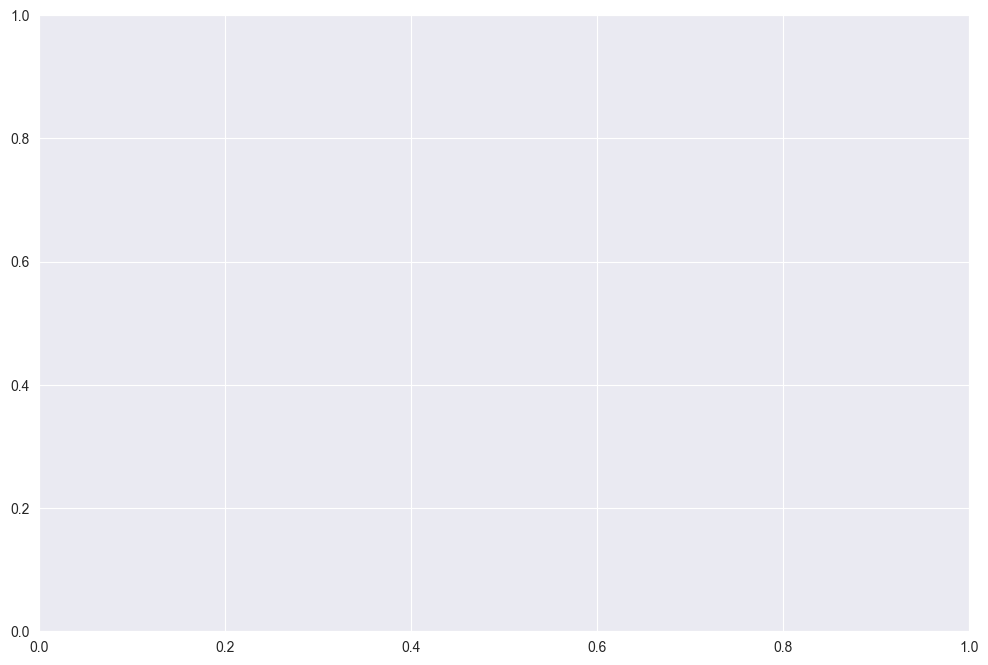

In [126]:
for col in df.columns:
    plt.figure(figsize=(12,8))
    df.boxplot(column=col)
    plt.title(f"Box Plot of {col}")
    plt.ylabel("Nilai")
    plt.show()


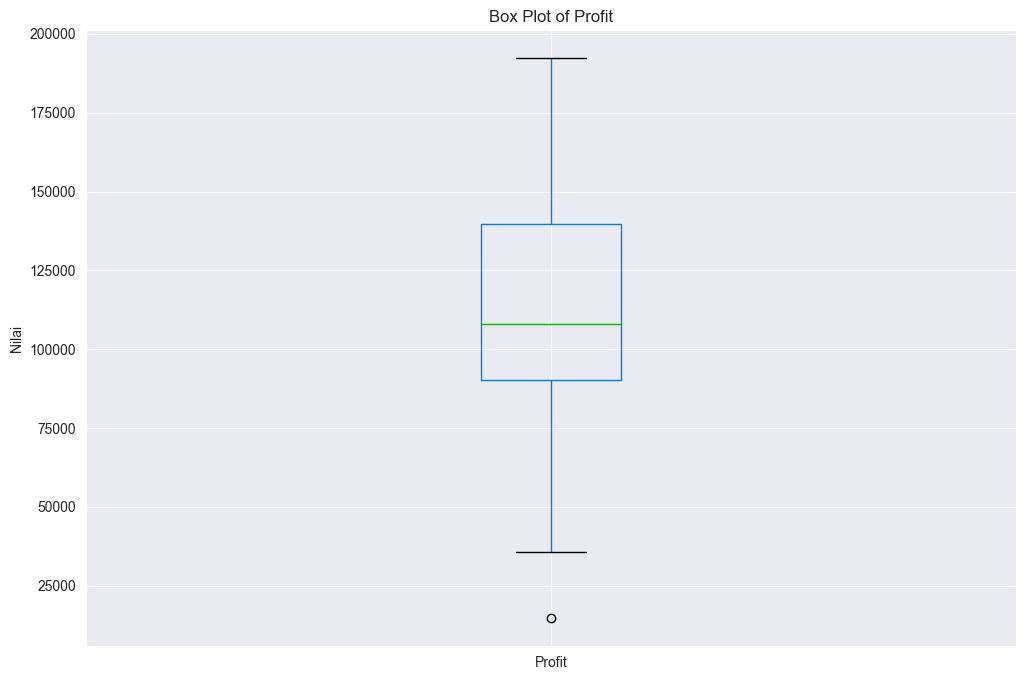

In [127]:
plt.figure(figsize=(12,8))
df.boxplot(column='Profit')
plt.title("Box Plot of Profit")
plt.ylabel("Nilai")
plt.show()

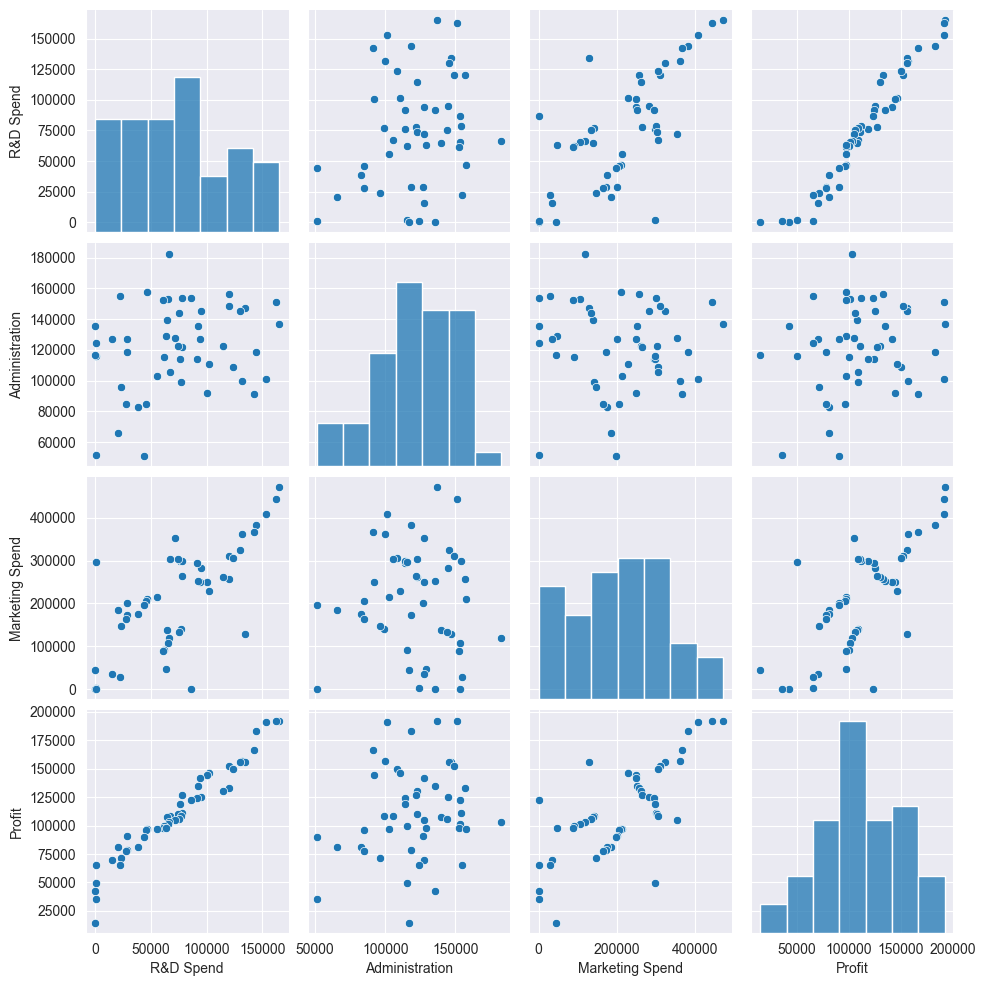

In [128]:
sns.pairplot(df)

<Axes: xlabel='State', ylabel='Profit'>

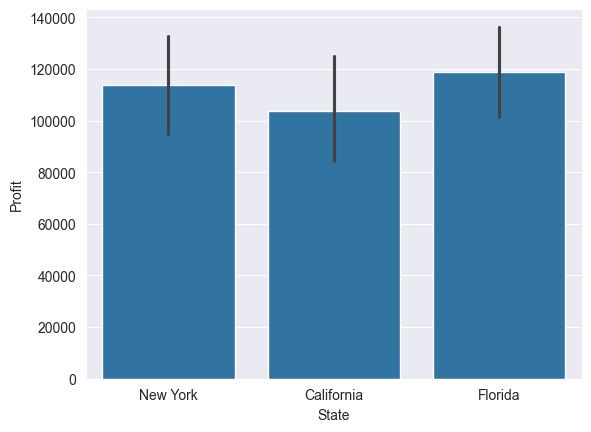

In [129]:
sns.barplot(df, x='State', y='Profit')

### Preprocessing before machine learning

In [103]:
cate_var = df.select_dtypes(include=['object', 'category', 'string'])
num_var = df.select_dtypes(include=['number'])

In [115]:
# pause disini
for col in cate_var.columns:
    sencoded = pd.get_dummies(cate_var[col], drop_first=False)
    df_encoded = pd.concat([num_var, sencoded], axis=1)

df_encoded

,R&D Spend,Administration,Marketing Spend,Profit,0,1,2
0,165349.20,136897.80,471784.10,192261.83,False,False,True
1,162597.70,151377.59,443898.53,191792.06,True,False,False
2,153441.51,101145.55,407934.54,191050.39,False,True,False
3,144372.41,118671.85,383199.62,182901.99,False,False,True
4,142107.34,91391.77,366168.42,166187.94,False,True,False
5,131876.90,99814.71,362861.36,156991.12,False,False,True
6,134615.46,147198.87,127716.82,156122.51,True,False,False
7,130298.13,145530.06,323876.68,155752.60,False,True,False
8,120542.52,148718.95,311613.29,152211.77,False,False,True
9,123334.88,108679.17,304981.62,149759.96,True,False,False


In [116]:
X = df_encoded.drop(columns='Profit')
y = df_encoded['Profit']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
lr = LinearRegression()
lr.fit(X_train, y_train)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [113]:
y_pred = lr.predict(X_test)

In [114]:
er_tu = r2_score(y_test, y_pred)
print(f"R2 score {er_tu:.4f}")

R2 score 0.9001
